In [1]:
### Bsic Level

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('/Users/yimanzhang/Desktop/DAT8-master/data/imdb_1000.csv')

In [3]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [9]:
movies.shape  ##data deminsion

(979, 6)

In [8]:
## check missing value
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [10]:
movies.dtypes ##check the data type of each column

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [12]:
movies.duration.mean()

120.97957099080695

In [15]:
movies.duration.max()

242

In [16]:
movies.duration.min()

64

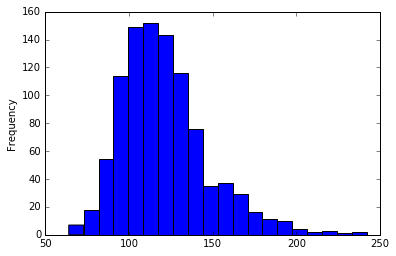

In [19]:
% matplotlib inline
movies.duration.plot(kind='hist',bins=20)

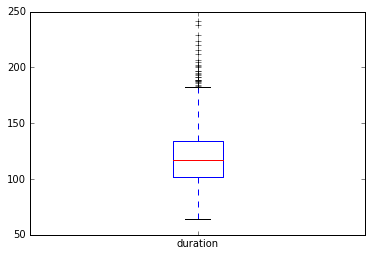

In [20]:
movies.duration.plot(kind='box')

In [21]:
### Intermediate Level
## count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

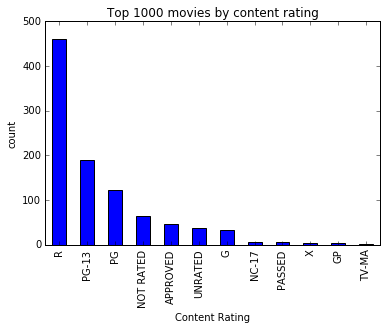

In [25]:
movies.content_rating.value_counts().plot(kind='bar',title='Top 1000 movies by content rating')
plt.xlabel('Content Rating')
plt.ylabel('count')

In [28]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','PG'],'UNRATED',inplace=True)

In [30]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(['TV-MA','X'],'NC-17',inplace=True)

In [32]:
## exminate missing value
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [34]:
movies.content_rating.fillna('UNRATED',inplace=True)

In [35]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [37]:
movies[movies.duration>=120].star_rating.mean()

7.9488986784140971

In [38]:
movies[movies.duration<120].star_rating.mean()

7.8386666666666649

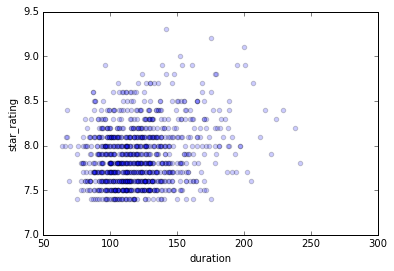

In [41]:
movies.plot(kind='scatter',x='duration',y='star_rating',alpha=0.2)

In [42]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

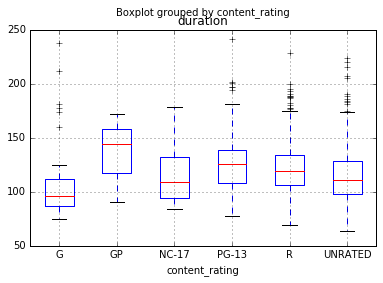

In [43]:
### Advanced Level
## visualize the relationship between content rating and duratio
movies.boxplot(column='duration',by='content_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10aa07be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10abd7c88>]], dtype=object)

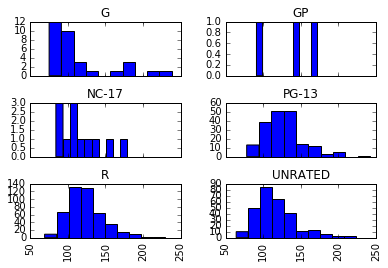

In [44]:
movies.hist(column='duration',by='content_rating',sharex=True)

In [46]:
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [53]:
movies.sort('star_rating',ascending=False).groupby('genre').title.first()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [54]:
movies.groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [60]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dup_title=movies[movies.title.duplicated()].title

In [62]:
movies[movies.title.isin(dup_title)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [78]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
##option 1
movies.genre.value_counts()>10
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>10]

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [84]:
## option 2
genre_rating=movies.groupby('genre').agg(['mean','count']).star_rating
genre_rating[genre_rating['count']>10]

In [95]:
## option 3
genre_count=movies.genre.value_counts()
top_genre=genre_count[genre_count>10].index
movies[movies.genre.isin(top_genre)].groupby('genre').star_rating.mean()